In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Defining path

path = r'/Users/lilia.verbenkogmail.com/Data Folder'

In [6]:
# Importing the dataframe 1

df = pd.read_excel(os.path.join(path, '02 Data', 'Original Data', 'FINAL_SCHOOLING_GDP.xlsx'))

In [7]:
df.shape

(5824, 11)

In [108]:
df.columns

Index(['Country', 'Continent', 'Human Development Groups', 'HDI Rank (2021)',
       'Year', 'Expected Years of Schooling', 'GDP', 'EYS Level'],
      dtype='object')

In [14]:
# Rename columns 

df.drop('Unnamed: 0', axis=1, inplace=True)

In [109]:
df.dtypes

Country                         object
Continent                       object
Human Development Groups        object
HDI Rank (2021)                  int64
Year                             int64
Expected Years of Schooling    float64
GDP                            float64
EYS Level                       object
dtype: object

In [110]:
df.head()

Country Continent Human Development Groups  HDI Rank (2021)  \
0       Equatorial Guinea    Africa                   Medium              145   
1  Bosnia and Herzegovina    Europe                     High               74   
2                   Libya    Africa                     High              104   
3       Equatorial Guinea    Africa                   Medium              145   
4       Equatorial Guinea    Africa                   Medium              145   

   Year  Expected Years of Schooling         GDP         EYS Level  
0  1997                    12.252354  150.972963  Medium EYS Level  
1  1996                    12.252354   88.957666  Medium EYS Level  
2  2012                    13.402500   86.765912  Medium EYS Level  
3  1996                    12.252354   66.579997  Medium EYS Level  
4  2001                     7.217413   63.379875     Low EYS Level

In [111]:
# Check for missing values

df.isnull().sum() # No missing values!

Country                        0
Continent                      0
Human Development Groups       0
HDI Rank (2021)                0
Year                           0
Expected Years of Schooling    0
GDP                            0
EYS Level                      0
dtype: int64

In [112]:
# Find duplicates

df_dups = df[df.duplicated()]

In [19]:
df_dups.shape 
# No dups

(0, 8)

In [20]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns 

## 1. Exploring relationships

In [113]:
# Create a correlation matrix using pandas

df.corr(numeric_only=True)

HDI Rank (2021)          Year  \
HDI Rank (2021)                 1.000000e+00 -9.932558e-15   
Year                           -9.932558e-15  1.000000e+00   
Expected Years of Schooling    -8.011261e-01  3.480796e-01   
GDP                             7.039949e-02 -4.378287e-02   

                             Expected Years of Schooling       GDP  
HDI Rank (2021)                                -0.801126  0.070399  
Year                                            0.348080 -0.043783  
Expected Years of Schooling                     1.000000 -0.096530  
GDP                                            -0.096530  1.000000

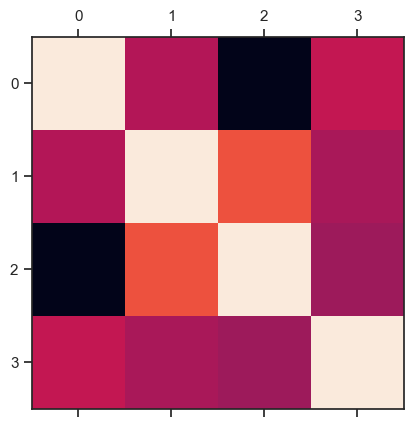

In [114]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr(numeric_only=True))
plt.show()

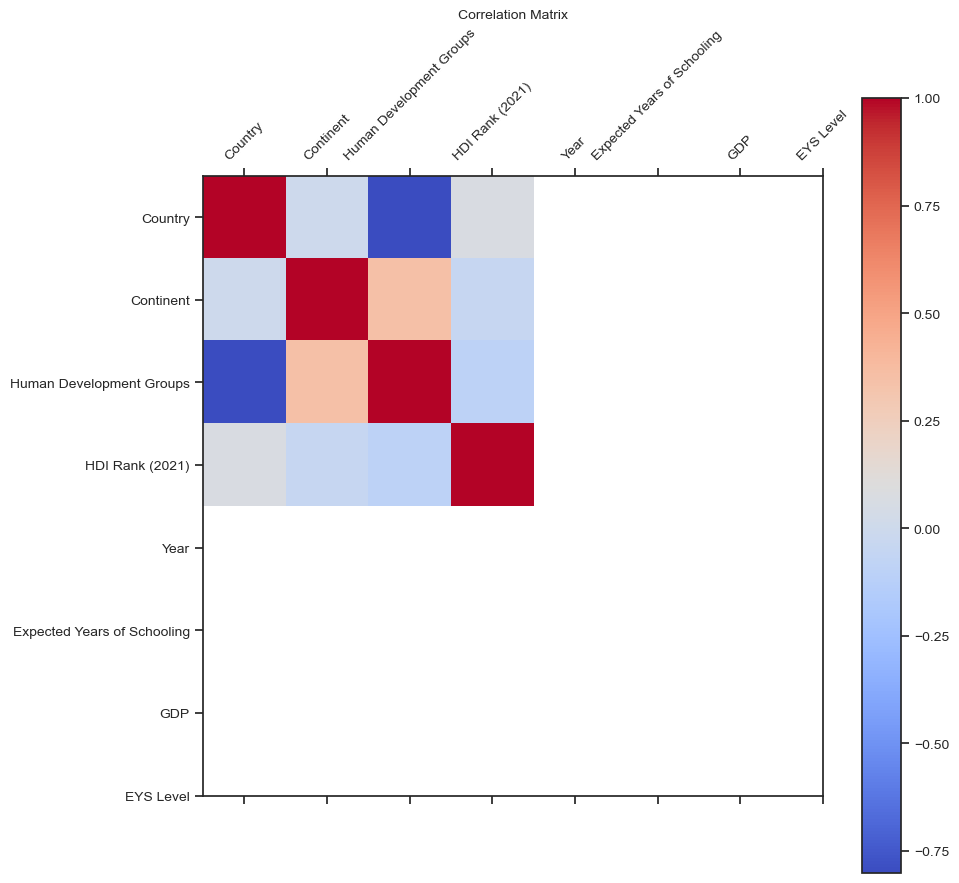

In [115]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(10, 10))  # Figure size (8x8)

# Plot the correlation matrix
plt.matshow(df.corr(numeric_only=True), fignum=f.number, cmap='coolwarm')  # Type of plot

# X-axis labels with fontsize 10
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45)
# Y-axis labels with fontsize 10
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)

# Add a color legend (called colorbar) with fontsize 10
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)  # Set colorbar font size

# Title with fontsize 10
plt.title('Correlation Matrix', fontsize=10)  # Modify fontsize as needed

plt.show()  # Show the plot


#### Create a correlation heatmap using seaborn:

In [116]:
df.columns

Index(['Country', 'Continent', 'Human Development Groups', 'HDI Rank (2021)',
       'Year', 'Expected Years of Schooling', 'GDP', 'EYS Level'],
      dtype='object')

In [30]:
# Create a subset excluding the 'Country', 'Continent' and 'Human Development Groups' columns

sub = df[['Year', 'Expected Years of Schooling','HDI Rank (2021)' ,'GDP']]

In [31]:
sub

Year  Expected Years of Schooling  HDI Rank (2021)         GDP
0     1997                    12.252354              145  150.972963
1     1996                    12.252354               74   88.957666
2     2012                    13.402500              104   86.765912
3     1996                    12.252354              145   66.579997
4     2001                     7.217413              145   63.379875
...    ...                          ...              ...         ...
5819  1992                    12.071438               63  -44.899999
5820  2021                     5.542510              191    0.000000
5821  1994                     6.316240              165  -50.248067
5822  2011                    13.719670              104  -50.305920
5823  1991                     9.501616              121  -64.047107

[5824 rows x 4 columns]

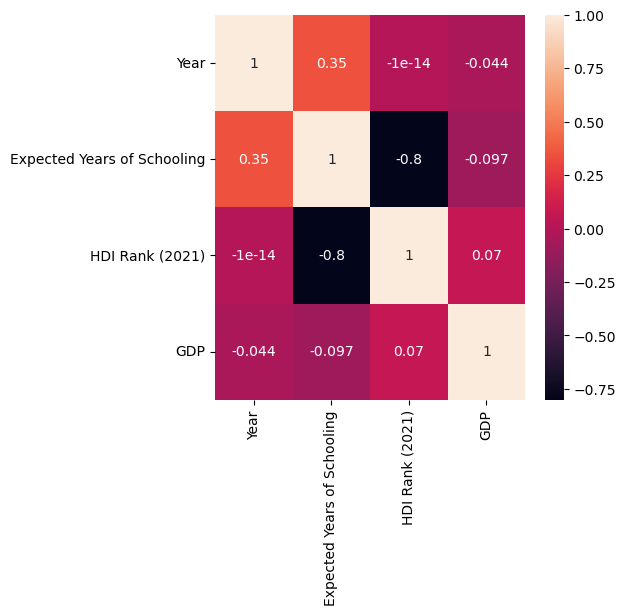

In [33]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(5,5))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Scatterplots:

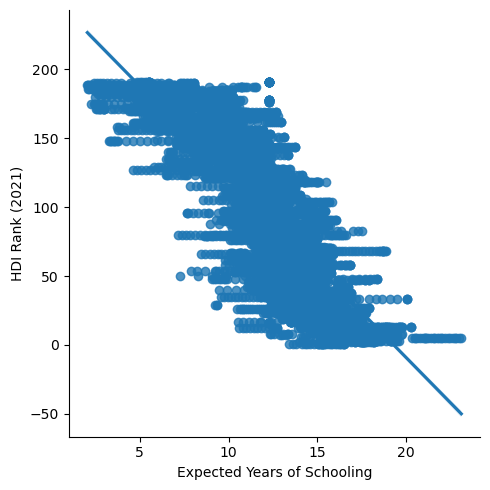

In [37]:
# Create a scatterplot for the 'HDI Rank (2021)' and 'Expected Years of Schooling' columns in seaborn. 

sns.lmplot(x = 'Expected Years of Schooling', y = 'HDI Rank (2021)', data = df)


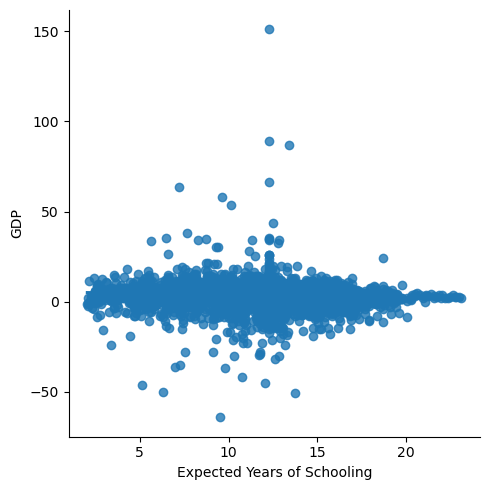

In [39]:
# Create a scatterplot for the "GDP" and "Expected Years of Schooling" columns in seaborn

sns.lmplot(x = 'Expected Years of Schooling', y = 'GDP', data = df)

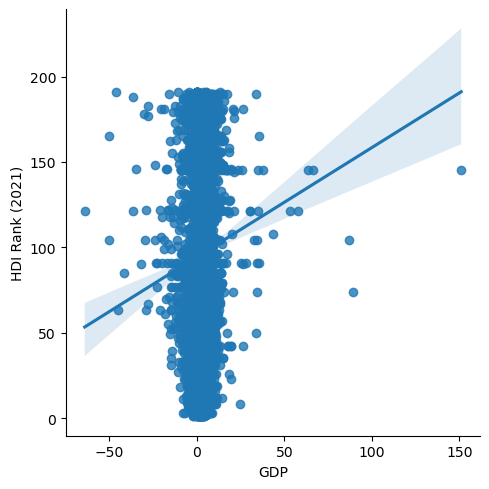

In [41]:
# Create a scatterplot for the "GDP" and "HDI Rank (2021)" columns in seaborn

sns.lmplot(x = 'GDP', y = 'HDI Rank (2021)', data = df)

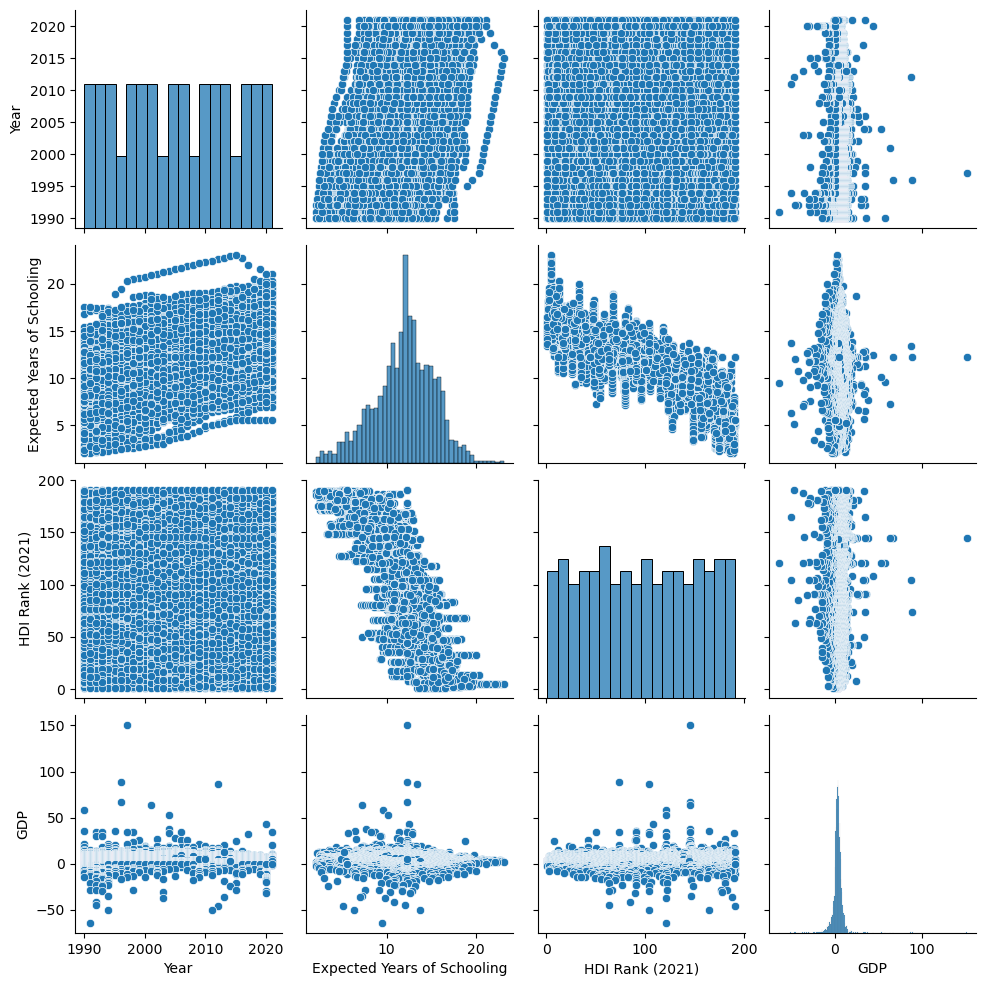

In [42]:
# Create a pair plot for 'Year', 'Expected Years of Schooling','HDI Rank (2021)' and 'GDP'

g = sns.pairplot(sub)

##### Creating a categorical variable that splits the "Expected Years of Schooling" column into categories

<Axes: xlabel='Expected Years of Schooling', ylabel='Count'>

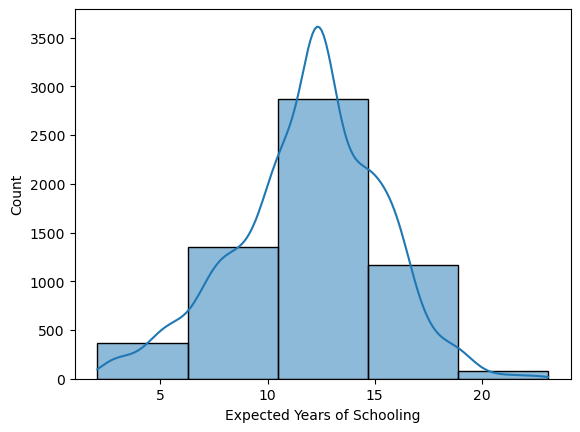

In [43]:
# Use a histogram to visualize the distribution of the Expected Years of Schooling.

sns.histplot(df['Expected Years of Schooling'], bins = 5, kde = True)

In [44]:
df.loc[df['Expected Years of Schooling'] < 6, 'EYS Level'] = 'Very Low EYS'

In [45]:
df.loc[(df['Expected Years of Schooling'] >= 6) & (df['Expected Years of Schooling'] < 10.2), 'EYS Level'] = 'Low EYS Level'

In [46]:
df.loc[(df['Expected Years of Schooling'] >= 10.2) & (df['Expected Years of Schooling'] < 14.9), 'EYS Level'] = 'Medium EYS Level'

In [47]:
df.loc[(df['Expected Years of Schooling'] >= 14.9) & (df['Expected Years of Schooling'] < 17), 'EYS Level'] = 'High EYS Level'

In [48]:
df.loc[df['Expected Years of Schooling'] >= 17, 'EYS Level'] = 'Very High EYS Level'

In [49]:
df['EYS Level'].value_counts(dropna = False)

Medium EYS Level       3116
Low EYS Level          1245
High EYS Level          842
Very Low EYS            331
Very High EYS Level     290
Name: EYS Level, dtype: int64

In [50]:
df.columns

Index(['Country', 'Continent', 'Human Development Groups', 'HDI Rank (2021)',
       'Year', 'Expected Years of Schooling', 'GDP', 'Cluster', 'EYS Level'],
      dtype='object')

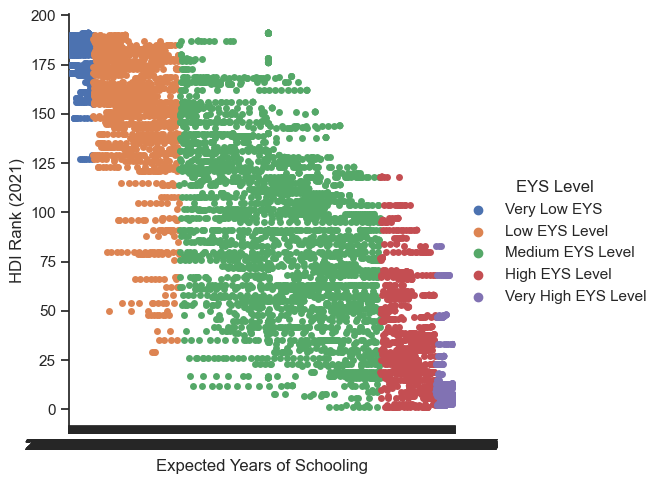

In [53]:
# Create a categorical plot in seaborn using the Expected Years of Schooling categories created above

sns.set(style="ticks")
g = sns.catplot(x="Expected Years of Schooling", y="HDI Rank (2021)", hue="EYS Level", data=df)

In [54]:
# fig = g.get_figure()
g.savefig("Expected Years of Schooling categories.png") 


## Geographic Visualization Folium

In [55]:
import os
import folium
import json

In [69]:
# Import ".json" 

country_geo = (path, '02 Data','Original Data', 'custom.geo.json')

In [70]:
# That's just in case you want to look at the JSON file contents here too:

file_path = "/Users/lilia.verbenkogmail.com/Downloads/custom.geo.json"

# Open the JSON file
with open(file_path) as f:
    # Load the JSON data as a dictionary
    country_geo = json.load(f)

# Iterating through the JSON list
for i in country_geo['features']:
    print(i)

{'type': 'Feature', 'properties': {'featurecla': 'Admin-0 country', 'scalerank': 1, 'labelrank': 5, 'sovereignt': 'Nicaragua', 'sov_a3': 'NIC', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'tlc': '1', 'admin': 'Nicaragua', 'adm0_a3': 'NIC', 'geou_dif': 0, 'geounit': 'Nicaragua', 'gu_a3': 'NIC', 'su_dif': 0, 'subunit': 'Nicaragua', 'su_a3': 'NIC', 'brk_diff': 0, 'name': 'Nicaragua', 'name_long': 'Nicaragua', 'brk_a3': 'NIC', 'brk_name': 'Nicaragua', 'brk_group': None, 'abbrev': 'Nic.', 'postal': 'NI', 'formal_en': 'Republic of Nicaragua', 'formal_fr': None, 'name_ciawf': 'Nicaragua', 'note_adm0': None, 'note_brk': None, 'name_sort': 'Nicaragua', 'name_alt': None, 'mapcolor7': 1, 'mapcolor8': 4, 'mapcolor9': 1, 'mapcolor13': 9, 'pop_est': 6545502, 'pop_rank': 13, 'pop_year': 2019, 'gdp_md': 12520, 'gdp_year': 2019, 'economy': '6. Developing region', 'income_grp': '4. Lower middle income', 'fips_10': 'NU', 'iso_a2': 'NI', 'iso_a2_eh': 'NI', 'iso_a3': 'NIC', 'iso_a3_eh': 'NIC', 

##### Extreme values checks

<Axes: xlabel='Expected Years of Schooling', ylabel='Count'>

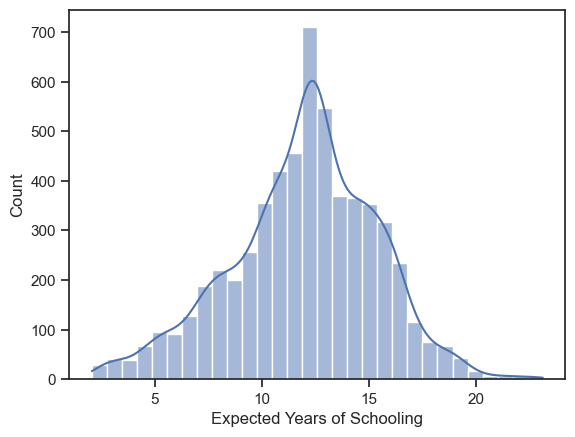

In [77]:
sns.histplot(df['Expected Years of Schooling'], bins=30, kde = True) # shows extreme values for 'Expected Years of Schooling'

In [78]:
df['Expected Years of Schooling'].mean() # Check the mean

11.95381590365728

In [79]:
df['Expected Years of Schooling'].median() # Check the median

12.25235361

In [80]:
df['Expected Years of Schooling'].max() # Check the max

23.08892059

In [85]:
# Check how many extreme values

unique_countries_extreme_values = df[df['Expected Years of Schooling'] > 20]['Country'].unique()
print(unique_countries_extreme_values)

['Australia' 'New Zealand' 'Greece']


The output indicates that the countries with extreme values (where "Expected Years of Schooling" is greater than 20) are Australia, New Zealand, and Greece.

### 4. Plotting a choropleth

In [68]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df[['Country','Expected Years of Schooling']]
data_to_plot.head()

Country  Expected Years of Schooling
0       Equatorial Guinea                    12.252354
1  Bosnia and Herzegovina                    12.252354
2                   Libya                    13.402500
3       Equatorial Guinea                    12.252354
4       Equatorial Guinea                     7.217413

In [73]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [90, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['Country','Expected Years of Schooling'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [74]:
map.save('Expected Years of Schooling-MAP.html')

## Machine Learning and Regression Analysis

In [75]:
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##### Data prep for regression analysis 

In [86]:
df.columns

Index(['Country', 'Continent', 'Human Development Groups', 'HDI Rank (2021)',
       'Year', 'Expected Years of Schooling', 'GDP', 'Cluster', 'EYS Level'],
      dtype='object')

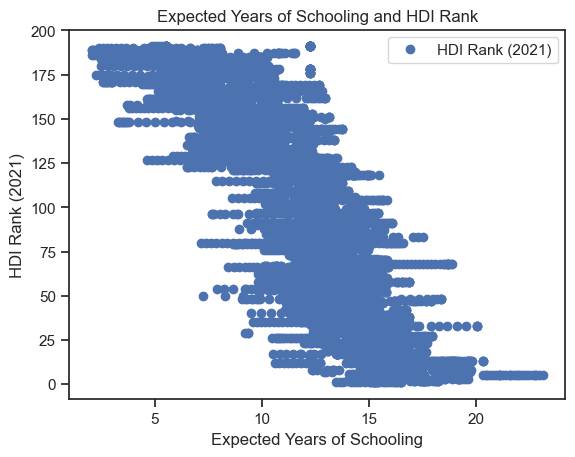

In [87]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Expected Years of Schooling', y='HDI Rank (2021)',style='o')
plt.title('Expected Years of Schooling and HDI Rank')  
plt.xlabel('Expected Years of Schooling')  
plt.ylabel('HDI Rank (2021)')  
plt.show()

In [89]:
correlation = df['Expected Years of Schooling'].corr(df['HDI Rank (2021)'])
correlation 

-0.8011260543405043

The correlation coefficient between "Expected Years of Schooling" and "HDI Rank (2021)" is indicates a strong negative correlation between the two variables. As one variable increases, the other tends to decrease, and vice versa.

In [90]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Expected Years of Schooling'].values.reshape(-1,1)
y = df['HDI Rank (2021)'].values.reshape(-1,1)

In [91]:
X

array([[12.25235361],
       [12.25235361],
       [13.4025    ],
       ...,
       [ 6.3162401 ],
       [13.71967   ],
       [ 9.501616  ]])

In [92]:
y

array([[145],
       [ 74],
       [104],
       ...,
       [165],
       [104],
       [121]])

In [93]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### Regression analysis

In [94]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [95]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [96]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

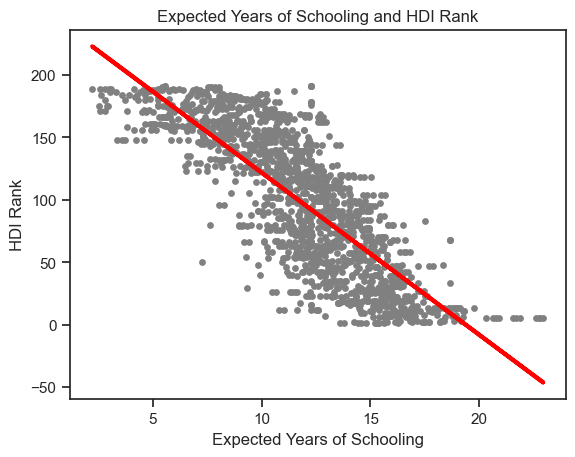

In [97]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Expected Years of Schooling and HDI Rank')
plot_test.xlabel('Expected Years of Schooling')
plot_test.ylabel('HDI Rank')
plot_test.show()

In [98]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [99]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-12.97778105]]
Mean squared error:  1087.0089109540093
R2 score:  0.6530175704020256


- The negative slope suggests an inverse relationship between "Expected Years of Schooling" and "HDI Rank (2021)" 
- The model explains a significant portion of the variance in the dependent variable.

#### Slope (Coefficient): 
On average, as the "Expected Years of Schooling" increases by 1 unit, the "HDI Rank (2021)" is expected to decrease by approximately 12.98 units.

#### R2 Score: 
The proportion of the variance in the dependent variable ("HDI Rank (2021)") that is predictable from the independent variable ("Expected Years of Schooling") suggests that around 65.3% of the variability in the HDI Rank can be explained by the Expected Years of Schooling. This indicates a moderately good fit of the model.

In [100]:
y_predicted

array([[ 66.0390161 ],
       [ 42.81501397],
       [ 83.12127828],
       ...,
       [ 68.75590976],
       [128.68257226],
       [ 46.18469781]])

In [101]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual   Predicted
0       63   66.039016
1       22   42.815014
2       96   83.121278
3      174  146.541848
4      127  149.475550
5      166   93.676728
6      159  179.320048
7      178  113.406581
8       68   43.189568
9      152  114.247763
10      42   42.335100
11     123   93.992329
12      22   65.187541
13      77   88.084293
14       1   74.624202
15      39   51.731273
16     160  179.476113
17      48   37.796634
18     175  213.961321
19       6    1.736587
20     104   84.570247
21     112   93.232397
22      22   41.632605
23      35   60.492365
24      28   56.242089
25      38   50.802448
26      80   37.581364
27     154  109.579708
28     125   90.940775
29     136  101.022437

##### Compare how the regression fits the training set

In [102]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [103]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [104]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-12.97778105]]
Mean squared error:  1112.6989502424367
R2 score:  0.6365850298353666


Comparing the training set with the overall evaluation, we can see that the model performs similarly on both the datasets. This suggests that the model generalizes well to unseen data.

#### Slope (Coefficient): 
Remains the same at approximately -12.98. 

#### R2 Score: 
Suggests that around 63.7% of the variability in the "HDI Rank (2021)" within the training set can be explained by the "Expected Years of Schooling." It indicates a moderately good fit to the training data.


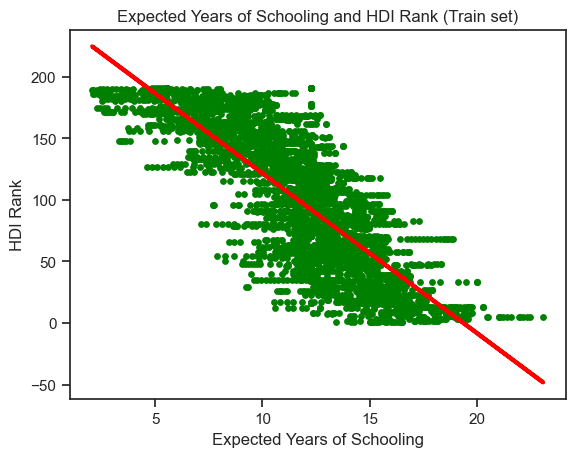

In [105]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Expected Years of Schooling and HDI Rank (Train set)')
plot_test.xlabel('Expected Years of Schooling')
plot_test.ylabel('HDI Rank')
plot_test.show()

### Machine Learning: Clustering

In [106]:
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
df.columns

Index(['Country', 'Continent', 'Human Development Groups', 'HDI Rank (2021)',
       'Year', 'Expected Years of Schooling', 'GDP', 'EYS Level'],
      dtype='object')

##### The elbow technique

In [118]:
subset_df = df[['HDI Rank (2021)', 'Year', 'Expected Years of Schooling', 'GDP']]

In [119]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [120]:
score = [kmeans[i].fit(subset_df).score(subset_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/lilia.verbenkogmail.com/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lilia.verbenkogmail.com/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lilia.verbenkogmail.com/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lilia.verbenkogmail.com/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

[-18739125.499872804,
 -5154531.521217698,
 -2714795.9283645935,
 -1826928.2883031075,
 -1427440.6961868957,
 -1220645.3428195843,
 -1093158.15360066,
 -1005873.4222587455,
 -949129.7974853598]

In [121]:
# Create KMeans instances with a specific n_init value
kmeans = [KMeans(n_clusters=i, n_init=10) for i in range(1, 11)]

# Compute the score for each cluster option
score = [kmeans[i].fit(subset_df).score(subset_df) for i in range(len(kmeans))]

score

[-18739125.499872804,
 -5154531.521217698,
 -2715261.7257095426,
 -1826928.2883031075,
 -1427440.6961868957,
 -1220952.1188881842,
 -1095659.5689392574,
 -1005891.1066912785,
 -954659.8673659462,
 -892221.3935855655]

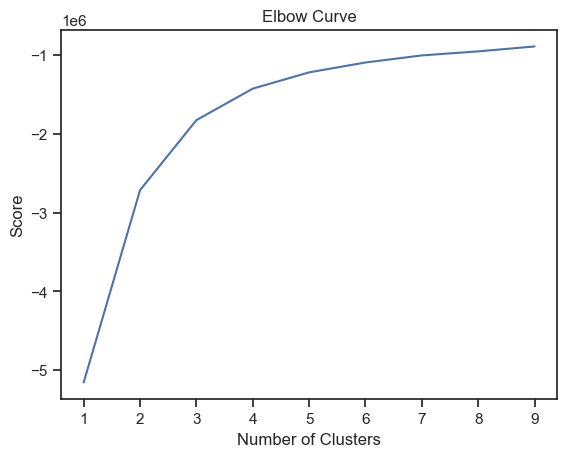

In [123]:
# Remove the first value from the score array to match the length of num_cl
score = score[1:]

# Plot the elbow curve using PyLab.
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### k-means clustering

In [124]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [125]:
# Fit the k-means object to the data.

kmeans.fit(subset_df)

/Users/lilia.verbenkogmail.com/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [127]:
# Create the k-means object with the desired number of clusters and n_init set explicitly.
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)

# Fit the model to your data.
kmeans.fit(subset_df)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [128]:
subset_df['clusters'] = kmeans.fit_predict(subset_df)

/var/folders/d3/wpfvwvmd5hq3sz8n_v74c_pm0000gn/T/ipykernel_71755/3030728355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['clusters'] = kmeans.fit_predict(subset_df)


In [129]:
subset_df = subset_df.copy()
subset_df['clusters'] = kmeans.fit_predict(subset_df)

In [130]:
subset_df

HDI Rank (2021)  Year  Expected Years of Schooling         GDP  clusters
0                 145  1997                    12.252354  150.972963         1
1                  74  1996                    12.252354   88.957666         0
2                 104  2012                    13.402500   86.765912         3
3                 145  1996                    12.252354   66.579997         1
4                 145  2001                     7.217413   63.379875         1
...               ...   ...                          ...         ...       ...
5819               63  1992                    12.071438  -44.899999         0
5820              191  2021                     5.542510    0.000000         1
5821              165  1994                     6.316240  -50.248067         1
5822              104  2011                    13.719670  -50.305920         3
5823              121  1991                     9.501616  -64.047107         3

[5824 rows x 5 columns]

In [131]:
subset_df['clusters'].value_counts()

1    1568
0    1472
3    1408
2    1376
Name: clusters, dtype: int64

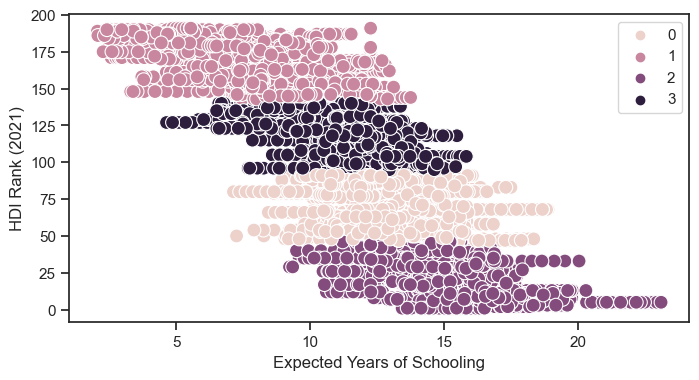

In [139]:
# Plot the clusters for the "Expected Years of Schooling" and "HDI Rank (2021)" variables.

plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=subset_df['Expected Years of Schooling'], y=subset_df['HDI Rank (2021)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Expected Years of Schooling') # Label x-axis.
plt.ylabel('HDI Rank (2021)') # Label y-axis.
plt.show()

In [132]:
df.columns

Index(['Country', 'Continent', 'Human Development Groups', 'HDI Rank (2021)',
       'Year', 'Expected Years of Schooling', 'GDP', 'EYS Level'],
      dtype='object')

In [140]:
subset_df.loc[subset_df['clusters'] == 2, 'cluster'] = 'Very High (dark purple)'
subset_df.loc[subset_df['clusters'] == 0, 'cluster'] = 'High (pink)'
subset_df.loc[subset_df['clusters'] == 3, 'cluster'] = 'Medium (black)'
subset_df.loc[subset_df['clusters'] == 1, 'cluster'] = 'Low (purple)'

In [141]:
subset_df.groupby('cluster').agg({'Expected Years of Schooling':['mean', 'median'], 
                         'HDI Rank (2021)':['mean', 'median'], 
                         'GDP':['mean', 'median']})

Expected Years of Schooling             \
                                               mean     median   
cluster                                                          
High (pink)                               13.135187  13.047374   
Low (purple)                               8.243488   8.350307   
Medium (black)                            11.546894  11.799667   
Very High (dark purple)                   15.334457  15.501490   

                        HDI Rank (2021)              GDP            
                                   mean median      mean    median  
cluster                                                             
High (pink)                   69.695652   69.0  3.015400  3.467709  
Low (purple)                 166.918367  166.0  3.978888  4.195270  
Medium (black)               117.863636  118.0  3.523779  3.878180  
Very High (dark purple)       23.186047   23.0  2.853879  2.861938

#### Low (purple) Cluster:
- Lower average number of Expected Years of Schooling.
- HDI Rank (2021): relatively high, indicating lower human development.
- GDP: The mean is 3.98, and the median is 4.20. The GDP is at a higher level compared to other clusters.

#### Medium (black) Cluster:
- Moderate average number of Expected Years of Schooling:
- HDI Rank (2021): in the middle range.
- GDP: is at a moderate level.

#### High (pink) Cluster: 
- Relatively high average number of Expected Years of Schooling.
- HDI Rank (2021): in the upper-middle range.
- GDP: a moderate level.

#### Very High (dark purple) Cluster:
- The highest average number of Expected Years of Schooling.
- HDI Rank (2021): very low, indicating high human development.
- GDP: is at a lower level, but this cluster excels in human development.


##### Insights:

- Clusters with higher expected years of schooling tend to have lower HDI ranks, indicating better human development.
- Clusters with lower expected years of schooling tend to have higher GDPs.
- The "Very High" cluster stands out with the highest expected years of schooling and a very low HDI rank, suggesting a focus on education despite lower economic indicators.
- The "Low" cluster has a higher GDP but lower expected years of schooling and a higher HDI rank, indicating a potential focus on economic development at the expense of education.

## Analyzing Time Series Data

In [142]:
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html 

In [180]:
df.dtypes

Country                         object
Continent                       object
Human Development Groups        object
HDI Rank (2021)                  int64
Year                             int64
Expected Years of Schooling    float64
GDP                            float64
EYS Level                       object
dtype: object

In [144]:
type(df)

pandas.core.frame.DataFrame

### Time-Series Line Chart of Years and GDP

In [227]:
subset_df = df[['Year', 'GDP']]

In [211]:
subset_df.head()

Year         GDP
0  1997  150.972963
1  1996   88.957666
2  2012   86.765912
3  1996   66.579997
4  2001   63.379875

In [228]:
# Set the "Year" column as the index
subset_df = subset_df.set_index('Year')

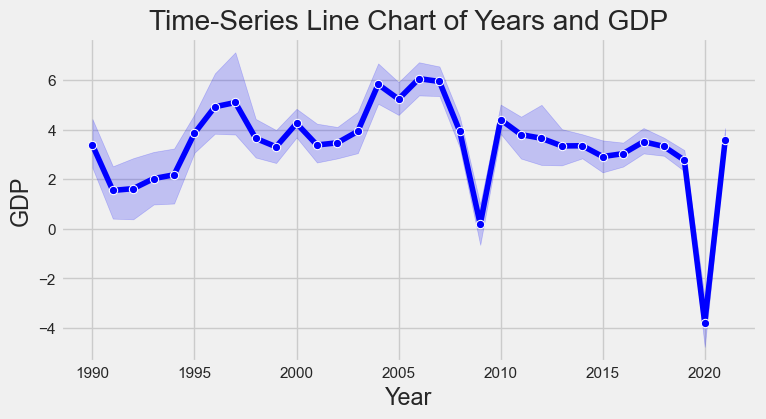

In [229]:
# Plot the time-series line chart
plt.figure(figsize=(8, 4))
sns.lineplot(data=subset_df, x=subset_df.index, y='GDP', marker='o', color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Time-Series Line Chart of Years and GDP')

# Display the plot
plt.show()


In [198]:
# fig = g.get_figure()
g.savefig("Time-Series Line Chart of Years and GDP.png") 


### Time-Series Line Chart of Annual Expected Years of Schooling

In [220]:
sub_df = df[['Year', 'Expected Years of Schooling']]

In [221]:
# Set the "Year" column as the index
sub_df = sub_df.set_index('Year')

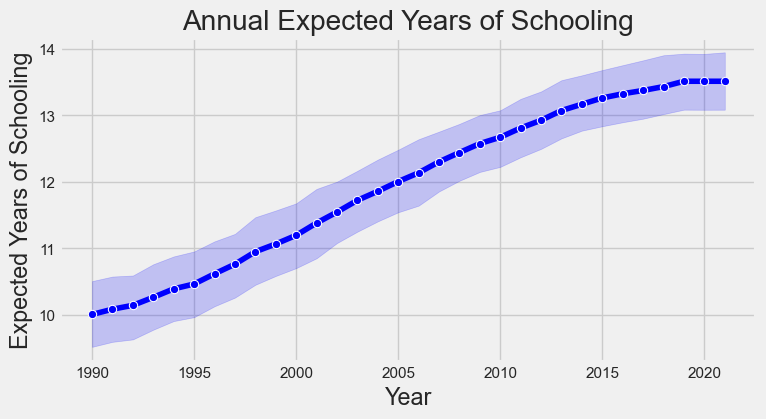

In [225]:
# Plot the time-series line chart
plt.figure(figsize=(8, 4))
sns.lineplot(data=sub_df, x=sub_df.index, y='Expected Years of Schooling', marker='o', color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Expected Years of Schooling')
plt.title('Annual Expected Years of Schooling')

# Display the plot
plt.show()

#### Testing for stationarity


In [230]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(subset_df['GDP'])

Dickey-Fuller Stationarity test:
Test Statistic                    7.647638
p-value                           1.000000
Number of Lags Used              34.000000
Number of Observations Used    5789.000000
Critical Value (1%)              -3.431480
Critical Value (5%)              -2.862039
Critical Value (10%)             -2.567036
dtype: float64


- p-value: 1.000000, which suggests that we fail to reject the null hypothesis that the time series is stationary.
- Test Statistic: 7.647638, which further supports the notion that the time series is non-stationary.

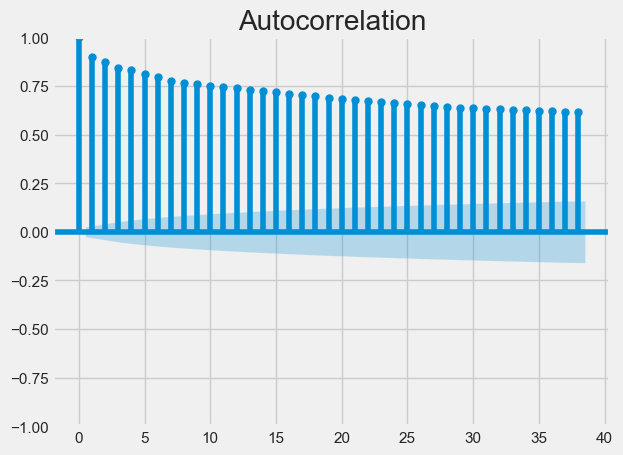

In [231]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(subset_df)
plt.show()

### 5. Stationarizing the Diesel Prices Data

In [232]:
data_diff = subset_df - subset_df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [233]:
data_diff = subset_df - subset_df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test

In [234]:
data_diff.head()

GDP
Year           
1996 -62.015297
2012  -2.191755
1996 -20.185914
2001  -3.200122
1990  -5.562047

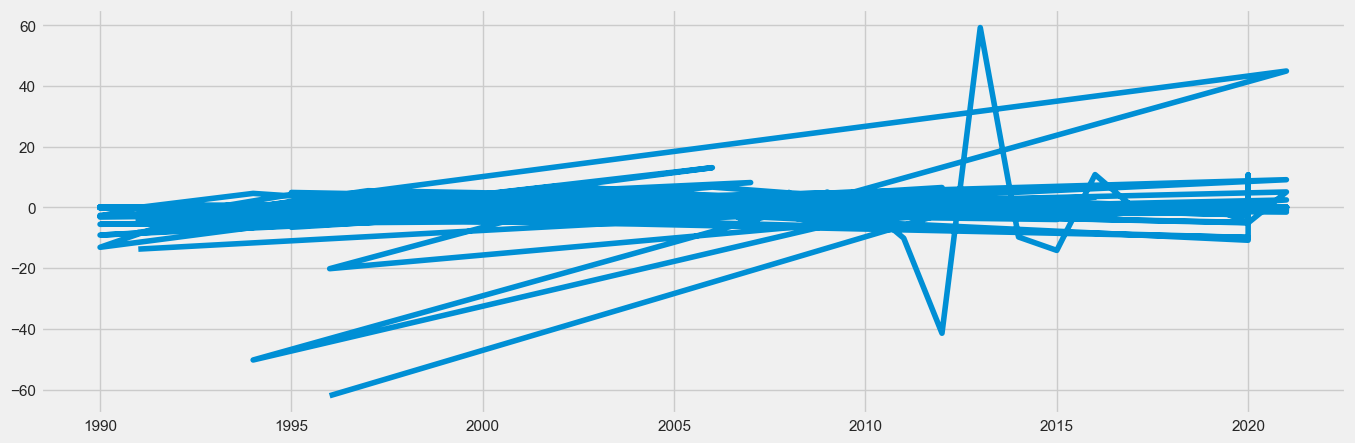

In [235]:


# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In the original time series we have observed trends, seasonality and other patterns that make it non-stationary. After differencing, we are essentially looking at how the series changes from one period to the next, removing the overall trend.

Stationarizing the GDP data through differencing has removed the overall trends, and we are left with a series that, on average, doesn't show systematic increases or decreases. 
The lack of flexible lines, drops, and falls in the chart suggests that the mean of the series is more constant over time.

In [236]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   -1.837407
p-value                           0.362055
Number of Lags Used              34.000000
Number of Observations Used    5788.000000
Critical Value (1%)              -3.431480
Critical Value (5%)              -2.862039
Critical Value (10%)             -2.567036
dtype: float64



- p-value: 0.362055, therefore, we fail to reject the null hypothesis, that the time series is non-stationary. 
